# Task 1: Setting the Baseline 
## Task 1.1 Data Preparation and Validation Pipeline

In [1]:
import pandas as pd 
import numpy as np

df_raw_train = pd.read_csv("./kaggle/input/3bodyproblem/mlNOVA/mlNOVA/X_train.csv")
df_raw_test = pd.read_csv("./kaggle/input/3bodyproblem/mlNOVA/mlNOVA/X_test.csv")

### Visualize few trajectories

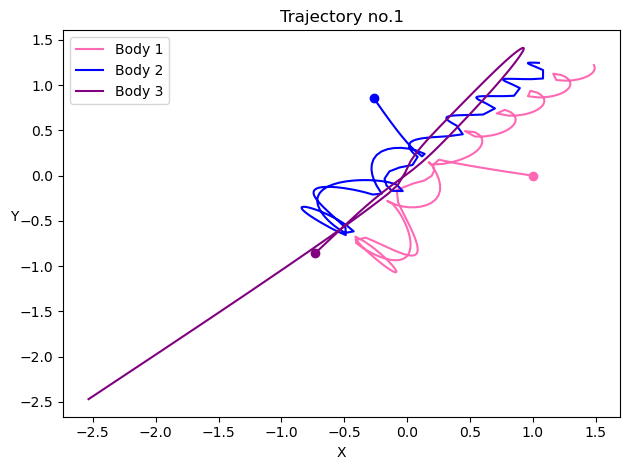

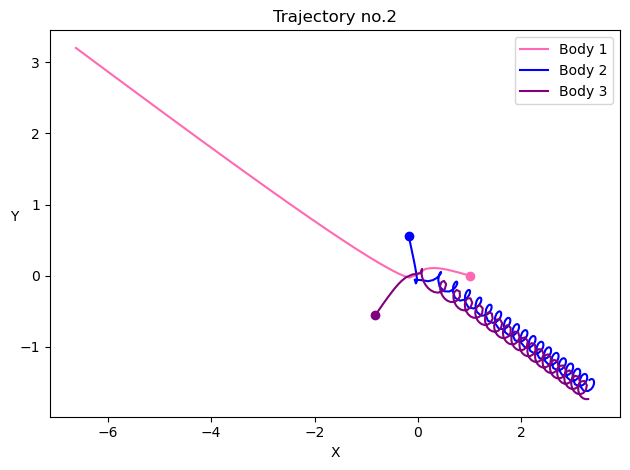

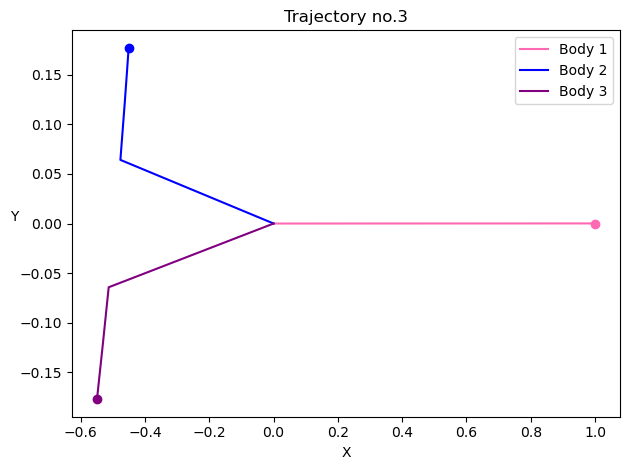

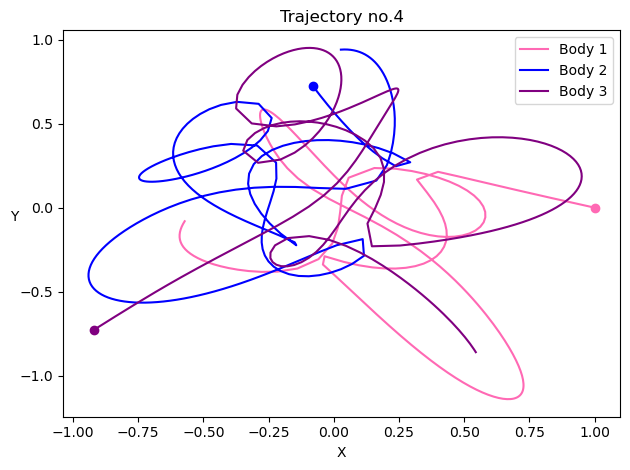

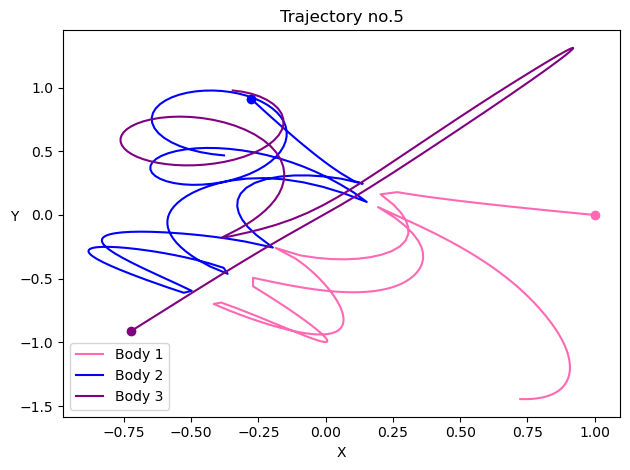

In [2]:
import matplotlib.pyplot as plt

start = 0
end = 257

for i in range(5):
    trajectory = df_raw_train[start:end]
    x1, y1, x2, y2, x3, y3 = trajectory.x_1, trajectory.y_1, trajectory.x_2, trajectory.y_2, trajectory.x_3, trajectory.y_3
    plt.plot(x1, y1, color="hotpink", label = "Body 1")
    plt.plot(x2, y2, color="blue", label = "Body 2")
    plt.plot(x3, y3, color="purple", label = "Body 3")
    plt.scatter(x1[start], y1[start], color="hotpink")
    plt.scatter(x2[start], y2[start], color="blue")
    plt.scatter(x3[start], y3[start], color="purple")
    plt.xlabel("X")
    plt.ylabel("Y", rotation=0)
    plt.title("Trajectory no." + str(i+1))
    plt.legend()
    plt.tight_layout()
    plt.show()

    start += 257
    end += 257


### Prepare the dataset

In [3]:
df_raw_train["group"] = df_raw_train["Id"]//257

In [4]:
#All starting positions
df_init = df_raw_train[ df_raw_train.index%257 == 0]

In [5]:
df_combined = df_raw_train.merge(df_init, on="group",  suffixes=('', '_init'))

# Step 1: Create a list/array of unique group_ids
unique_groups = df_combined['Id_init'].unique()

# Step 2: Create a random mask for this list
mask_train_test = np.random.rand(len(unique_groups)) < 0.8  # random True/False values

# Step 3: Split unique groups into two sets
group_train = unique_groups[mask_train_test]  # groups for the training set
group_testing = unique_groups[~mask_train_test]  # groups for the test set

# Step 4: Use the mask to split the DataFrame
train_set = df_combined[df_combined['Id_init'].isin(group_train)]
testing_set = df_combined[df_combined['Id_init'].isin(group_testing)]


unique_groups1 = testing_set['Id_init'].unique()

mask_val_test = np.random.rand(len(unique_groups1)) < 0.5

group_validation = unique_groups1[mask_val_test]  # groups for the training set
group_test = unique_groups1[~mask_val_test]  # groups for the test set

validation_set = testing_set[testing_set['Id_init'].isin(group_validation)]
test_set = testing_set[testing_set['Id_init'].isin(group_test)]



In [6]:
train_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
257,0.000000,1.000000,0.000000,0.000000,0.000000,-0.176502,0.555739,0.000000,0.000000,-0.823498,...,0.0,-0.176502,0.555739,0.0,0.0,-0.823498,-0.555739,0.0,0.0,257
258,0.039062,0.999392,0.000131,-0.031160,0.006723,-0.176326,0.555148,0.008985,-0.030279,-0.823065,...,0.0,-0.176502,0.555739,0.0,0.0,-0.823498,-0.555739,0.0,0.0,257
259,0.078125,0.997564,0.000525,-0.062415,0.013460,-0.175799,0.553372,0.017992,-0.060639,-0.821765,...,0.0,-0.176502,0.555739,0.0,0.0,-0.823498,-0.555739,0.0,0.0,257
260,0.117188,0.994513,0.001183,-0.093859,0.020224,-0.174920,0.550408,0.027043,-0.091163,-0.819593,...,0.0,-0.176502,0.555739,0.0,0.0,-0.823498,-0.555739,0.0,0.0,257
261,0.156250,0.990228,0.002106,-0.125591,0.027029,-0.173686,0.546247,0.036162,-0.121934,-0.816542,...,0.0,-0.176502,0.555739,0.0,0.0,-0.823498,-0.555739,0.0,0.0,257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1284995,9.843750,-0.022787,-0.354678,-1.450539,-0.511101,-0.128897,-0.618452,1.066492,-0.497032,0.151684,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284996,9.882810,-0.082072,-0.384254,-1.556362,-1.038875,-0.084507,-0.627569,1.177829,0.065469,0.166578,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284997,9.921880,-0.140434,-0.438907,-1.348462,-1.794786,-0.040823,-0.610311,0.975436,0.853069,0.181257,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743
1284998,9.960940,-0.177344,-0.524277,-0.380080,-2.492241,-0.018380,-0.561151,0.012292,1.579595,0.195724,...,0.0,-0.300429,0.400142,0.0,0.0,-0.699571,-0.400142,0.0,0.0,1284743


In [7]:
validation_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
0,0.000000,1.000000,0.000000,0.000000,0.000000,-0.266467,0.859196,0.000000,0.000000,-0.733533,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
1,0.039062,0.999548,0.000092,-0.023159,0.004731,-0.266261,0.858781,0.010574,-0.021257,-0.733287,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
2,0.078125,0.998190,0.000370,-0.046362,0.009474,-0.265641,0.857535,0.021172,-0.042552,-0.732549,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
3,0.117188,0.995925,0.000833,-0.069654,0.014239,-0.264606,0.855456,0.031817,-0.063924,-0.731318,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
4,0.156250,0.992747,0.001483,-0.093080,0.019040,-0.263154,0.852540,0.042533,-0.085412,-0.729592,...,0.0,-0.266467,0.859196,0.0,0.0,-0.733533,-0.859196,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1281654,9.843750,-1.461081,0.670221,0.993174,-0.021191,-1.542492,0.408971,-1.545438,0.144521,3.003573,...,0.0,-0.472486,0.523105,0.0,0.0,-0.527514,-0.523105,0.0,0.0,1281402
1281655,9.882810,-1.426125,0.660538,0.778060,-0.452679,-1.598959,0.423450,-1.327142,0.574866,3.025084,...,0.0,-0.472486,0.523105,0.0,0.0,-0.527514,-0.523105,0.0,0.0,1281402
1281656,9.921880,-1.401405,0.636448,0.476549,-0.761695,-1.645066,0.452290,-1.022489,0.882754,3.046471,...,0.0,-0.472486,0.523105,0.0,0.0,-0.527514,-0.523105,0.0,0.0,1281402
1281657,9.960940,-1.389609,0.602442,0.119612,-0.961876,-1.678126,0.491003,-0.662448,1.081823,3.067736,...,0.0,-0.472486,0.523105,0.0,0.0,-0.527514,-0.523105,0.0,0.0,1281402


In [8]:
test_set

,t,x_1,y_1,v_x_1,v_y_1,x_2,y_2,v_x_2,v_y_2,x_3,...,v_y_1_init,x_2_init,y_2_init,v_x_2_init,v_y_2_init,x_3_init,y_3_init,v_x_3_init,v_y_3_init,Id_init
3341,0.000000,1.000000,0.000000,0.000000,0.000000,-0.135443,0.213232,0.000000,0.000000,-0.864557,...,0.0,-0.135443,0.213232,0.0,0.0,-0.864557,-0.213232,0.0,0.0,3341
3342,0.039062,0.999223,0.000081,-0.039801,0.004138,-0.135805,0.212586,-0.018559,-0.033077,-0.863418,...,0.0,-0.135443,0.213232,0.0,0.0,-0.864557,-0.213232,0.0,0.0,3341
3343,0.078125,0.996889,0.000323,-0.079708,0.008251,-0.136898,0.210645,-0.037510,-0.066351,-0.859991,...,0.0,-0.135443,0.213232,0.0,0.0,-0.864557,-0.213232,0.0,0.0,3341
3344,0.117188,0.992993,0.000725,-0.119830,0.012316,-0.138746,0.207397,-0.057266,-0.100031,-0.854247,...,0.0,-0.135443,0.213232,0.0,0.0,-0.864557,-0.213232,0.0,0.0,3341
3345,0.156250,0.987523,0.001284,-0.160275,0.016306,-0.141389,0.202822,-0.078294,-0.134345,-0.846135,...,0.0,-0.135443,0.213232,0.0,0.0,-0.864557,-0.213232,0.0,0.0,3341
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283710,9.843750,-0.898298,-2.081685,-0.405259,0.782790,-0.905981,-1.688107,0.387408,-0.875370,1.804278,...,0.0,-0.155949,0.598394,0.0,0.0,-0.844051,-0.598394,0.0,0.0,1283458
1283711,9.882810,-0.914064,-2.045491,-0.396643,1.091984,-0.890895,-1.727883,0.379652,-1.182770,1.804959,...,0.0,-0.155949,0.598394,0.0,0.0,-0.844051,-0.598394,0.0,0.0,1283458
1283712,9.921880,-0.928378,-1.993449,-0.310188,1.640464,-0.877228,-1.783436,0.294055,-1.729459,1.805606,...,0.0,-0.155949,0.598394,0.0,0.0,-0.844051,-0.598394,0.0,0.0,1283458
1283713,9.960940,-0.926303,-1.900713,1.553294,3.892218,-0.879916,-1.879614,-1.568574,-3.979427,1.806219,...,0.0,-0.155949,0.598394,0.0,0.0,-0.844051,-0.598394,0.0,0.0,1283458


### Verify dataset splitting

In [9]:
# Get sorted unique Id_init values
unique_sorted_ids_train = sorted(set(train_set['Id_init'].values))
unique_sorted_ids_val = sorted(set(validation_set['Id_init'].values))
unique_sorted_ids_test = sorted(set(test_set['Id_init'].values))

# Find intersection of the two sets
intersection_ids1 = sorted(set(unique_sorted_ids_train) & set(unique_sorted_ids_val))
intersection_ids2 = sorted(set(unique_sorted_ids_train) & set(unique_sorted_ids_test))
intersection_ids3 = sorted(set(unique_sorted_ids_test) & set(unique_sorted_ids_val))

# Display the results]
print("Intersection of IDs:", intersection_ids1)
print("Intersection of IDs:", intersection_ids2)
print("Intersection of IDs:", intersection_ids3)

Intersection of IDs: []
Intersection of IDs: []
Intersection of IDs: []


In [10]:
input_train = train_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
input_validation = validation_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]

input_train.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init
257,0.000000,1.0,0.0,-0.176502,0.555739,-0.823498,-0.555739
258,0.039062,1.0,0.0,-0.176502,0.555739,-0.823498,-0.555739
259,0.078125,1.0,0.0,-0.176502,0.555739,-0.823498,-0.555739
260,0.117188,1.0,0.0,-0.176502,0.555739,-0.823498,-0.555739
261,0.156250,1.0,0.0,-0.176502,0.555739,-0.823498,-0.555739


In [11]:
input_validation.head()

,t,x_1_init,y_1_init,x_2_init,y_2_init,x_3_init,y_3_init
0,0.000000,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
1,0.039062,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
2,0.078125,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
3,0.117188,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196
4,0.156250,1.0,0.0,-0.266467,0.859196,-0.733533,-0.859196


In [12]:
output_train = train_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
output_validation = validation_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]

output_train.head()

,x_1,y_1,x_2,y_2,x_3,y_3
257,1.000000,0.000000,-0.176502,0.555739,-0.823498,-0.555739
258,0.999392,0.000131,-0.176326,0.555148,-0.823065,-0.555279
259,0.997564,0.000525,-0.175799,0.553372,-0.821765,-0.553898
260,0.994513,0.001183,-0.174920,0.550408,-0.819593,-0.551591
261,0.990228,0.002106,-0.173686,0.546247,-0.816542,-0.548353


In [13]:
output_validation.head()


,x_1,y_1,x_2,y_2,x_3,y_3
0,1.000000,0.000000,-0.266467,0.859196,-0.733533,-0.859196
1,0.999548,0.000092,-0.266261,0.858781,-0.733287,-0.858874
2,0.998190,0.000370,-0.265641,0.857535,-0.732549,-0.857905
3,0.995925,0.000833,-0.264606,0.855456,-0.731318,-0.856289
4,0.992747,0.001483,-0.263154,0.852540,-0.729592,-0.854022


In [14]:
groups = train_set["group"]
groups

257           1
258           1
259           1
260           1
261           1
           ... 
1284995    4999
1284996    4999
1284997    4999
1284998    4999
1284999    4999
Name: group, Length: 1027486, dtype: int64

### Function to save predictions to csv

In [66]:
def save_predictions_to_csv(predictions: np.ndarray, output_file_name: str):

    """
    Saves the given NumPy array with predictions to a CSV file.

    Parameters:
    - predictions (np.ndarray): A NumPy array containing the data to be saved.
    - output_file_name (str): The name of the output CSV file (without .csv extension).
    """

    predictions_df = pd.DataFrame(predictions, columns=["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"])
    predictions_df.insert(0, 'Id', range(len(predictions_df)))
    predictions_df.to_csv("./output/csv"+output_file_name+".csv", index=False)

## Task 1.2 Learn the baseline model

In [15]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

nn = MLPRegressor(random_state=1, max_iter=3)
svm = SVR(kernel="linear")
model = LinearRegression()
modelRidge = Ridge()
modelLasso = Lasso()

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline(
    [
            ('scaling', StandardScaler()), 
            ("model", modelRidge)
    ])
pipe

Pipeline(steps=[('scaling', StandardScaler()), ('model', Ridge())])

In [17]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GroupKFold

    
pipe.fit(input_train, output_train)
y_hat = pipe.predict(input_validation)
mse = mean_squared_error(output_validation, y_hat, squared = False)

print("MSE: ", mse)

MSE:  1.1731982194472357


In [63]:
import numpy as np

def plot_y_yhat(y_validation, y_pred, plot_title = "plot"):
    labels = ['x_1','y_1','x_2','y_2','x_3','y_3']
    MAX = 500
    if len(y_validation) > MAX:
        idx = np.random.choice(len(y_validation),MAX, replace=False)
    else:
        idx = np.arange(len(y_validation))
    plt.figure(figsize=(10,10))
    for i in range(6):
        x0 = np.min(y_validation[idx,i])
        x1 = np.max(y_validation[idx,i])
        plt.subplot(3,2,i+1)
        plt.scatter(y_validation[idx,i],y_pred[idx,i])
        plt.xlabel('True '+labels[i])
        plt.ylabel('Predicted '+labels[i])
        plt.plot([x0,x1],[x0,x1],color='red')
        plt.axis('square')
    plt.savefig("./output/plots"+plot_title+'.pdf')
    plt.show()

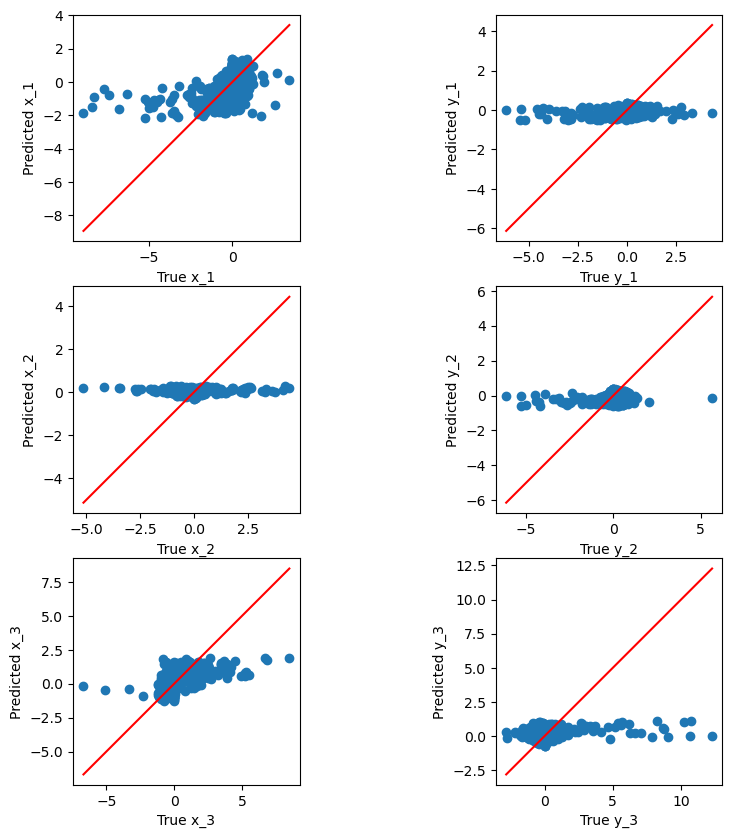

In [19]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(y_hat).to_numpy())


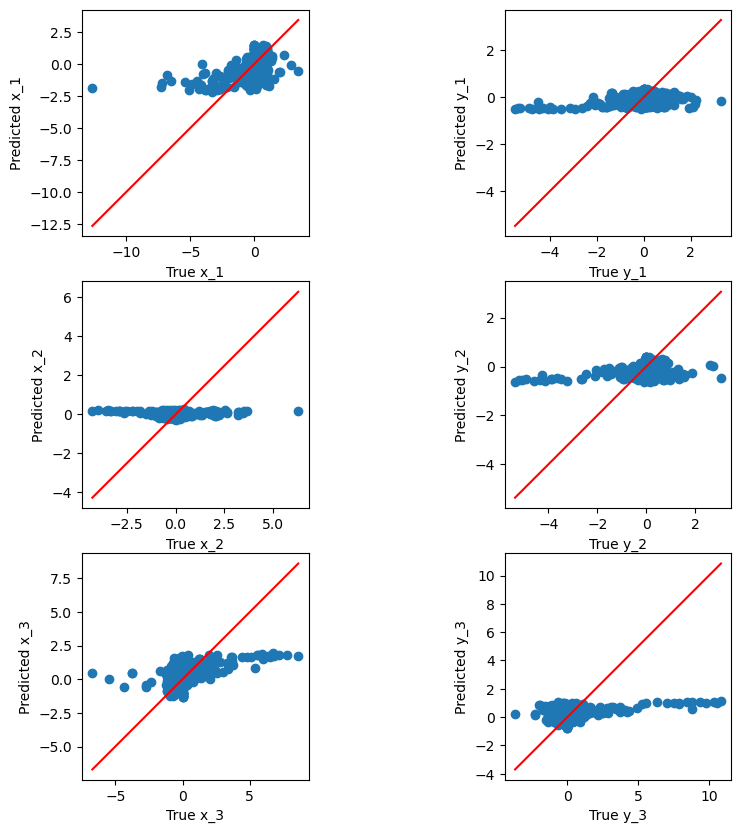

In [20]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(y_hat).to_numpy())

# Task 2: Nonlinear models on the data — the Polynomial Regression model
## Task 2.1 Development

In [106]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error

def validate_poly_regression(X_train, y_train, X_val, y_val, regressor=None, degrees=range(1,9), max_features=None):
    
    #best_rsme = [1000, 1000, 1000]
    best_degrees_rsmes = [[0, 1000], [0, 1000], [0, 1000]]
    train_scores = []
    validation_scores = []
    n_features_list = []

    for d in degrees:
        print("Degree ", d)

        pipe_d_degree= Pipeline(
    [       ('preprocessor', PolynomialFeatures(degree=d)),
            ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
    ])

        pipe_d_degree.fit(X_train, y_train)

        n_features = pipe_d_degree.named_steps['preprocessor'].n_output_features_
        n_features_list.append(n_features)

        y_train_predict = pipe_d_degree.predict(X_train)
        y_val_predict = pipe_d_degree.predict(X_val)


        train_error = np.sqrt(mean_squared_error(y_train, y_train_predict))
        #print("Train RMSE:", train_error)

        val_error = np.sqrt(mean_squared_error(y_val, y_val_predict))
        print("Val RMSE:", val_error)

        if val_error < best_degrees_rsmes[2][1]:
            best_degrees_rsmes[2][1] = val_error
            best_degrees_rsmes[2][0] = d
            best_degrees_rsmes.sort(key=lambda x: x[1], reverse=False)

        train_scores.append(train_error)
        validation_scores.append(val_error)
    
    best_degrees = [item[0] for item in best_degrees_rsmes]
    best_rsmes = [item[1] for item in best_degrees_rsmes]

    return train_scores, validation_scores, best_rsmes, best_degrees, n_features_list

In [107]:
degrees=range(1,9)
degree_scores = {d: {'train_scores': [], 'test_scores': []} for d in degrees}
best_rsmes = []
best_degrees = []

for _ in range(10):

    sample_train_set = train_set.sample(frac=0.01)
    sample_input_train = sample_train_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
    sample_output_train = sample_train_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
    
    train_scores, validation_scores, best_rsme, best_degree, n_features_list = validate_poly_regression(sample_input_train, sample_output_train, input_validation, output_validation, degrees=degrees)

    best_rsmes.append(min(best_rsme))
    best_degrees.append(best_degree[0])
    best_degrees.append(best_degree[1])
    best_degrees.append(best_degree[2])

    for d in degrees:
        degree_scores[d]['train_scores'].append(train_scores[d-1])
        degree_scores[d]['test_scores'].append(validation_scores[d-1])

# Save best RMSEs and degrees to CSV
#
# df_best = pd.DataFrame({
#    'best_degree': best_degrees,
#    'best_rsme': best_rsmes
#    
#})

#df_best.to_csv('./output/csv/PR_best_rsme_degrees.csv', index=False)

Degree  1
Val RMSE: 1.6666983730406666
Degree  2
Val RMSE: 1.514476350051949
Degree  3
Val RMSE: 1.5316646286653186
Degree  4
Val RMSE: 2.0033810036251283
Degree  5
Val RMSE: 1.963059944154986
Degree  1
Val RMSE: 1.3105573799640198
Degree  2
Val RMSE: 1.3102439405861808
Degree  3
Val RMSE: 1.2964135009414197
Degree  4
Val RMSE: 1.2960945138249926
Degree  5
Val RMSE: 1.4192820344195238
Degree  1
Val RMSE: 1.312054677883887
Degree  2
Val RMSE: 1.3120297148716298
Degree  3
Val RMSE: 1.3115288928344664
Degree  4
Val RMSE: 1.3037562034645096
Degree  5
Val RMSE: 1.9289392092886184
Degree  1
Val RMSE: 1.468812961306916
Degree  2
Val RMSE: 2.394983298166616
Degree  3
Val RMSE: 3.1954645335499556
Degree  4
Val RMSE: 7.301244970369966
Degree  5
Val RMSE: 16.086958557128227
Degree  1
Val RMSE: 1.7248032760982084
Degree  2
Val RMSE: 1.6921201423133174
Degree  3
Val RMSE: 1.6583015794361957
Degree  4
Val RMSE: 1.6801508022119858
Degree  5
Val RMSE: 2.9832898240218384
Degree  1
Val RMSE: 1.284779101

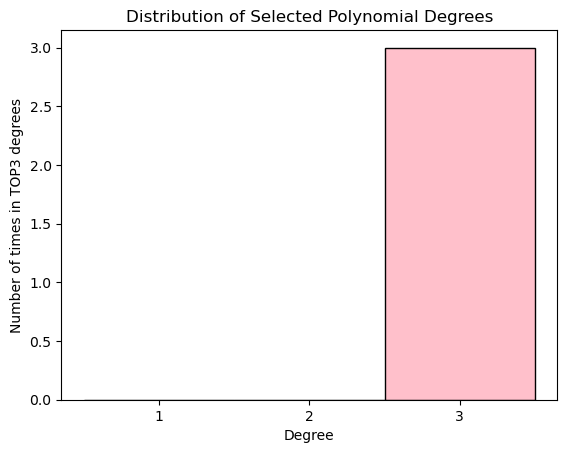

In [114]:
import matplotlib.pyplot as plt

# Create bin edges so that each bar is centered on its respective integer
bin_edges = [i - 0.5 for i in range(1, len(degrees) + 2)]  # Create bin edges

plt.hist(best_degrees, bins=bin_edges, color='pink', edgecolor='black')

plt.xticks(range(1, len(degrees) + 1))

plt.title('Distribution of Selected Polynomial Degrees')
plt.xlabel('Degree')
plt.ylabel('Number of times in TOP3 degrees')

plt.show()

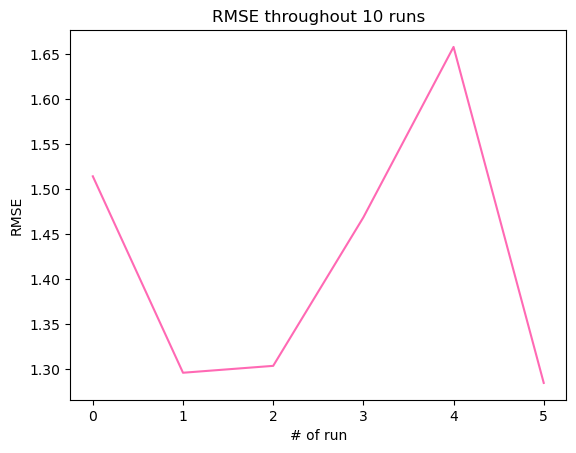

In [109]:
plt.plot(best_rsmes, color='hotpink')
plt.title('RMSE throughout 10 runs')
plt.xlabel('# of run')
plt.ylabel('RMSE')
plt.show()

### Train with the 3 best-degree models on more data

In [110]:
from collections import Counter

top_3_degrees = Counter(best_degrees).most_common(3)

most_frequent_degrees = [degree for degree, count in top_3_degrees]

print("Top 3 most frequent degrees:", sorted(most_frequent_degrees))


Top 3 most frequent degrees: [1, 2, 3]


In [113]:
degrees=sorted(most_frequent_degrees)
degree_scores = {d: {'train_scores': [], 'test_scores': []} for d in degrees}
best_rsmes = []
best_degrees = []

for _ in range(5):

    sample_train_set = train_set.sample(frac=0.35)
    sample_input_train = sample_train_set[["t","x_1_init", "y_1_init", "x_2_init", "y_2_init", "x_3_init", "y_3_init"]]
    sample_output_train = sample_train_set[["x_1", "y_1", "x_2", "y_2", "x_3", "y_3"]]
    
    train_scores, validation_scores, best_rsme, best_degree, n_features_list = validate_poly_regression(sample_input_train, sample_output_train, input_validation, output_validation, degrees=degrees)

    best_index = best_rsme.index(min(best_rsme))
    best_rsmes.append(best_rsme[best_index])
    best_degrees.append(best_degree[best_index])

    for d in degrees:
        degree_scores[d]['train_scores'].append(train_scores[d-1])
        degree_scores[d]['test_scores'].append(validation_scores[d-1])

Degree  1
Val RMSE: 1.2002363569945902
Degree  2
Val RMSE: 1.157903222428457
Degree  3
Val RMSE: 1.1146038245921266
Degree  1
Val RMSE: 1.20040467578819
Degree  2
Val RMSE: 1.158198239835957
Degree  3
Val RMSE: 1.1150346954709593
Degree  1
Val RMSE: 1.2002127417220398
Degree  2
Val RMSE: 1.1580164437298863
Degree  3
Val RMSE: 1.114794894496744


### Train on the best-degree model on all data

In [116]:
best_degree_ever = max(set(best_degrees), key=best_degrees.count)

print("Best degree", best_degree_ever)

pipe_best_degree= Pipeline(
[       ('preprocessor', PolynomialFeatures(degree=best_degree_ever)),
        ('model', RidgeCV(alphas=np.logspace(-6, 6, 13)))
])

pipe_best_degree.fit(input_train, output_train)

output_train_predict = pipe_best_degree.predict(input_train)
output_val_predict = pipe_best_degree.predict(input_validation)

train_error = np.sqrt(mean_squared_error(output_train, output_train_predict))
print("Train RMSE:", train_error)

val_error = np.sqrt(mean_squared_error(output_validation, output_val_predict))
print("Validation RMSE:", val_error)

Best degree 3
Train RMSE: 1.2567833767999153
Validation RMSE: 1.1149266561760036


## Task 2.2 Evaluation

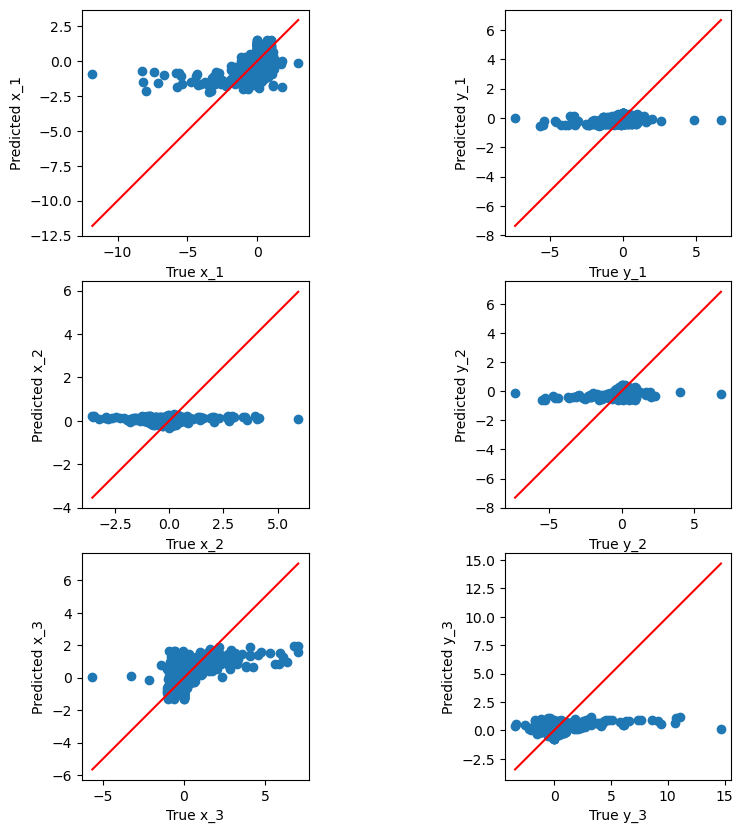

In [67]:
plot_y_yhat(output_validation.to_numpy(), pd.DataFrame(output_val_predict).to_numpy())

# Task 3: Feature Engineering
## Task 3.1 Removing variables

## Task 3.2 Evaluation of Variable Reduction

## Task 3.3 Adding Variables

## Task 3.4 Evaluation of Variable Augmentation

# Task 4: Nonparamentric Model — the k-Nearest Neighbors Regressor
## Task 4.1 Development

In [19]:
    
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

modelKnn = KNeighborsRegressor()

pipe = Pipeline(
    [
            ('scaling', StandardScaler()), 
            ("model", modelKnn)
    ])
pipe
    

Pipeline(steps=[('scaling', StandardScaler()),
                ('model', KNeighborsRegressor())])

In [20]:

pipe.fit(input_train, output_train)
y_hat = pipe.predict(input_validation)
rmse_list.append(mean_squared_error(output_validation, y_hat, squared = False))

print(rmse_list)
print("AVG:", sum(rmse_list)/len(rmse_list))


#def validate_knn_regression(X_train, y_train, X_val, y_val, k=range(1,15)):


NameError: name 'X_validation' is not defined

## Task 4.2 Evaluation

# Task 5 [Optional]